In [1]:
#Getting the libraries
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np

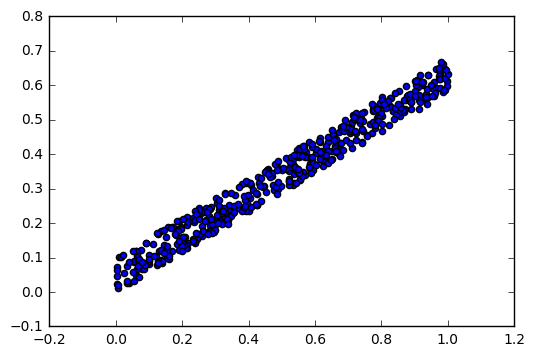

In [2]:
#Generating Data
N = 500 #no of points
X = np.zeros(N)
Y = np.zeros(N)
slope = 0.58
for i in range(N):
    X[i] = np.random.rand()
    Y[i] = X[i] * slope + np.random.rand() * 0.1
plt.scatter(X, Y)
plt.show()

In [3]:
#Creating a 2 Layered Neural Network
neurons_hidden1 = 5
w1 = np.zeros(neurons_hidden1) 
w2 = np.zeros(neurons_hidden1) 

for i in range(neurons_hidden1):
    w1[i] = np.random.randn()
    w2[i] = np.random.randn()

In [4]:
#Hyper-parameters
step_size = 0.1
epoch = 200

In [5]:
#Training The Neural Network
def train():
    global w1
    global w2
    for i in range(N):
        
        hidden_layer = np.maximum(0, np.dot(X[i], w1))#ReLu Activation
        score = np.dot(hidden_layer, w2)
        
        #Computing the Loss
        loss = (Y[i] - score) ** 2 
        
        #Computing the gradients
        inter = 2 * ((X[i] ** 2) * np.dot(w1, w2) - Y[i] * X[i]) 
        dw2 = np.dot(w1, inter)
        dw1 = np.dot(w2, inter)
        
        #parameter update
        w1 = w1 - np.dot(dw1, step_size)
        w2 = w2 - np.dot(dw2, step_size)
        return
        #print(loss)
    
#print(np.dot(w1, w2))    
    

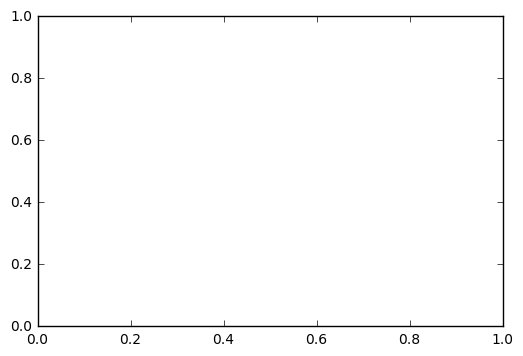

In [6]:
#Animations
grid_size = 1
fig,ax = plt.subplots()
ax.set_xlim(( 0, grid_size))
ax.set_ylim((0, grid_size))

line1, = ax.plot([], [], 'bo')
line2, = ax.plot([], [], 'r-')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

def animate(i):
    global w1
    global w2
    train()
    k = 100
    x_line = np.zeros(k)
    y_line = np.zeros(k)
    slp = np.dot(w1, w2)
    for i in range(k):
        x_line[i] = np.random.rand()
        y_line[i] = slp * x_line[i]         
    line1.set_data(X, Y)
    line2.set_data(x_line, y_line)
    return line1, line2

In [7]:
anim = animation.FuncAnimation(fig, animate,init_func = init, frames = epoch, interval = 100, blit=True)
HTML(anim.to_html5_video())

In [8]:
x = 4
w = [1, 2, 3, 4]
z = np.dot(w, x)
print(z)

[ 4  8 12 16]


In [9]:
d = [1, 2, 3, 4]
gg = [0, 0, 0, 1]
gfl = np.dot(gg, d)
s = gfl * 5
print(s)

20
